<a href="https://colab.research.google.com/github/klarcika/TZ/blob/main/Naloga4_Navodila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
df= pd.read_csv("housing_brez_nan.csv")
df.dtypes

Unnamed: 0             object
Type                   object
Rooms                 float64
Bathroom              float64
CarSpots              float64
Landsize              float64
BuildingArea          float64
YearBuilt             float64
Price                 float64
SellerG                object
Suburb                 object
DistanceFromCenter    float64
Lattitude             float64
Longtitude            float64
Regionname             object
dtype: object

In [7]:
#spremenimmo kategoricne podatke v stevilske
#label encoder li dummy vrednosti
from sklearn.preprocessing import LabelEncoder
df1=df.copy(deep=True)
#dolocimo katrgoricne podatke; izhodnih podatkov ne spreminjamo v številske
kat= ["SellerG","Suburb", "Regionname"];
for k in kat:
  df1[k]=LabelEncoder().fit_transform(df1[k])

df1.head()

,Unnamed: 0,Type,Rooms,Bathroom,CarSpots,Landsize,BuildingArea,YearBuilt,Price,SellerG,Suburb,DistanceFromCenter,Lattitude,Longtitude,Regionname
0,1 Abercrombie St,house,4.0,2.000000,2.000000,596.000000,161.000000,1980.000000,1.046312e+06,200,246,14.7,-37.932000,145.082700,4
1,1 Aberfeldie Wy,house,5.0,3.000000,2.000000,588.584711,217.000000,2005.000000,6.800000e+05,22,68,14.8,-37.727050,144.748560,6
2,1 Acheron Av,house,3.0,1.608363,1.701148,588.584711,158.274673,1965.475409,8.900000e+05,323,263,12.0,-37.811555,145.001695,2
3,1 Adelle Ct,house,3.0,2.000000,2.000000,820.000000,158.274673,1965.475409,1.700000e+06,22,112,13.9,-37.780300,145.124800,0
4,1 Aintree Rd,house,4.0,3.000000,4.000000,349.000000,158.274673,1965.475409,1.046312e+06,200,150,9.2,-37.858000,145.043300,5


In [9]:
#kategoricnim ne dodajamo stevilskih vrednostih, ker jih lahko sestevamo
#na primer :
#modra->1
#rdeca->2
#zelena->3

In [13]:
#2. nacin spreminjanja
df2= pd.get_dummies(df, columns=kat)
df2.shape

(30718, 703)

In [ ]:
# ce uporabimo get dummies nam bo naredilo dodatne stolpce
# in ce se te vrednsti pojavijo dobijo vrednosti 0 ali 1

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
izhod="Type"
df_izhod=df1["Type"]
df_vhod= df1.drop(izhod, axis=1)

kfold=StratifiedKFold(n_splits=5)
rezultat= cross_val_score(KNeighborsClassifier(n_neighbors==5), df_vhod, df_izhod, cv=kfold, scoring="accuracy")

print(rez.mean()) #ker nam bi drugace izpisalo 5 povprecij, za vsak fold, zato nardimo povprecje teh 5 foldov

In [ ]:
df_izhod=df2["Type"]
df_vhod= df2.drop(izhod, axis=1)

kfold=StratifiedKFold(n_splits=5)
rezultat= cross_val_score(KNeighborsClassifier(n_neighbours=5), df_vhod, df_izhod, cv=kfold, scoring="accuracy")

print(rez.mean()) #ker nam bi drugace izpisalo 5 povprecij, za vsak fold, zato nardimo povprecje teh 5 foldov


<ipython-input-17-8b522501bbcd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Price)


<Axes: xlabel='Price', ylabel='Density'>

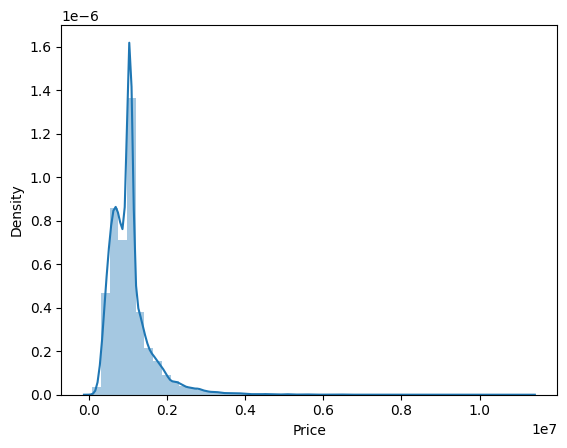

In [17]:
stevilski=["Rooms", "Bathroom", "CarSpots", "Landsize", "YearBuilt", "Price", "DistanceFromCenter"]
#stevilske spremenimo, da izrisemo histogram
import seaborn as sns
sns.distplot(df.Price)
#ce nimamo lepih podatkov, jih standardiziramo
#delamo na intervalu[-1,1] in poprecje je 0; to je pomembno, ker imamo v df razlicne intervale stevil
#knn racuna razdalje in racuna vrednosti med stevilskimi stolpci lahko racuna razlicne razdalje in to vpliva na rezultat


In [20]:
#pazimo da imamo pravilne vrednosti dolocene za vhod pa izhod
from sklearn.preprocessing import StrandardScaler
df2[stevilski]= StandardScaler().fit_transform(df2[stevilski])
df.head()

In [ ]:
df_izhod=df2["Type"]
df_vhod= df2.drop(izhod, axis=1)

kfold=StratifiedKFold(n_splits=5)
rezultat= cross_val_score(KNeighborsClassifier(n_neighbours=5), df_vhod, df_izhod, cv=kfold, scoring="accuracy")

In [ ]:
#algoritma ki nam omogocata standardizacijo
from sklearn.model_selection import GridSearchCV
parametri={
    'n_neighbours': [1, 3, 5,  10], 'algorithm': ['ball_tree', 'kd_tree']  #parametri in nabor vrednosti
    #zelimo kartero povprecje teh foldov bo imel najboljso vrednost
}
grid_k= GridSearchCV(KNeighborsClassifier(), parametri, cv=10, scoring="accuracy")
grid_k.fit(df_vhod, df_izhod)
print(grid_k.best_params_)
print(grid_k.best_score_) #rezultat
print(grid_k.best_estimator_)#najboljsa uporaba/ nastavitev
#grid : parametre vzame da jih testira in naredi kombinacijo vsakega z vsakim

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import sp_radint #statisticna knjiznica v pythonu
parametri={    #nakljucne vrednsoti od 1-5
    'n_neighbours': sp_radint(1,5), 'algorithm': ['ball_tree', 'kd_tree']  #parametri in nabor vrednosti
    #zelimo kartero povprecje teh foldov bo imel najboljso vrednost
}
rand_k= RandomizedSearchCV(KNeighborsClassifier(),param_distributions= parametri, cv=10,n_iter=10, scoring="accuracy")
 #št iteracij moremo nastavit, da omejimo da ne gre v nedogled; ker randomize nakljucn mece not parametre, da bi bili najboljsi za ta klasifikator
rand_k.fit(df_vhod, df_izhod)
print(rand_k.best_params_) #kateri je najbolji algoritem za uporabo
print(rand_k.best_score_) #rezultat
print(rand_k.best_estimator_)#najboljsa uporaba/ nastavitev